## Exercise 5. Regularization of Linear Regression and Bias-Variance Trade-off
(with Python, _from scratch_)

---
This notebook follows the one in [Matlab_track](https://github.com/jhonsen/machinelearn_NG/tree/master/Matlab_track) which focuses on doing __Regularization on a linear regression model__, i.e., defining cost regularized function and plotting training and validation errors


### Section 1.1. Visualizing the dataset
This dataset is divided into three parts:  
- A training set that your model will learn on: X, y
- A cross validation set for determining the regularization parameter:
Xval, yval
- A test set for evaluating performance. These are "unseen" examples
which your model did not see during training: Xtest, ytest

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from scipy.io import loadmat
from scipy.optimize import fmin_cg
from scipy.optimize import minimize


In [2]:
data = loadmat('../Matlab_track/ex5/ex5data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [3]:
y_train = data['y']
X_train = np.c_[np.ones_like(data['X']), data['X']]

yval = data['yval']
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]


print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('Xval:', Xval.shape)
print('yval:', yval.shape)

X_train: (12, 2)
y_train: (12, 1)
Xval: (21, 2)
yval: (21, 1)


<function matplotlib.pyplot.show(*args, **kw)>

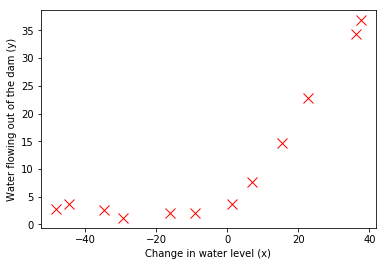

In [6]:
plt.figure()
plt.plot(X_train[:,1:], y_train,'rx',markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.show

### Section 1.2. Regularized linear regression cost function

Recall that the cost function and gradient are:  
  
  
- [x] Write the cost function and partial derivative for $\theta$, define __linearRegCostFunction__

In [76]:
def linearRegCostFunction(theta, X,y,lamd):
    m = X.shape[0]
    
    # hypothesis function
    h = X  @ theta        #<-- size: (12x2).(2x1)= (12x1)
    
    # cost function
    J = (1/(2*m)) * np.sum(np.square(h-y)) #<-- sum(--12x1)--) is scalar
    
    # Apply Regularization
    J = J + (lamd/(2*m)) * np.sum( np.square(theta[1:]) )  #<-- scalar + scalar

    return J

In [77]:
def gradRegCostFunction(theta,X,y, lamd):
    m = X.shape[0]
    
    # hypothesis function
    h = X.dot(theta).reshape(-1,1)        #<-- size: (12x2).(2x1)= (12x1)
    
    # derivative
    grad = (1/m) * X.T @ (h-y)    #<-- grad is  (2x12).(12x1) = (2x1)
    
    grad = grad + (lamd/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]  #<-- (2x1) + scalar x (2x1)
    
    return grad.flatten()

In [78]:
theta = np.asarray([[1],[1]])
m = X_train.shape[0]

J = linearRegCostFunction(theta, X_train, y_train, 1)
grad = gradRegCostFunction(theta, X_train, y_train, 1)
print('Cost at theta = [1 ; 1]: %s (which should be about 303.993192)\n' %J)
print('Gradient at theta = [1; 1] is:\n%s \n(which should be about\n[-15.303016; 598.250744])\n' %(grad))

Cost at theta = [1 ; 1]: 303.9931922202643 (which should be about 303.993192)

Gradient at theta = [1; 1] is:
[-15.30301567 598.25074417] 
(which should be about
[-15.303016; 598.250744])



In [79]:
gradient = lrgradientReg(initial_theta, X_train, y_train, 0)
gradient


array([-15.30301567, 598.16741084])

In [80]:
gradient = gradRegCostFunction(theta, X_train, y_train, 0)
gradient

array([-15.30301567, 598.16741084])

In [81]:
def lrCostFunction(theta, X, y, reg):
    m = y.size
    h = X.dot(theta)
    
    J = (1/(2*m))*np.sum(np.square(h-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
   
    return(J)


In [82]:
def lrgradientReg(theta, X, y, reg):
    m = y.size

    h = X.dot(theta).reshape(-1,1)
        
    grad = (1/m)*(X.T.dot(h-y))+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [83]:
initial_theta = np.asarray([[1],[1]])

cost = lrCostFunction(initial_theta, X_train, y_train, 0)
gradient = lrgradientReg(initial_theta, X_train, y_train, 0)

print(cost)
print(gradient)


303.9515255535976
[-15.30301567 598.16741084]


### Section 1.3. Fitting Linear Regression  
In this part, we set regularization parameter $\theta$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension.  
The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model.  
- [x] Training LR model on the dataset using function __trainLinearReg__, which finds theta parameters
- [x] Plot the best fit line on the dataset 

In [96]:
def trainLinearReg(X, y, reg):
#     initial_theta = np.array( [[1],[1]] )
    initial_theta = np.array([[15],[15]])
    # For some reason the minimize() function does not converge when using
    # zeros as initial theta.
        
    res = minimize(lrCostFunction, initial_theta, args=(X,y,reg), method=None, jac=lrgradientReg,
                   options={'maxiter':5000})
    
    return(res)

In [97]:
fit = trainLinearReg(X_train, y_train, 0)
fit

      fun: 1604.4002999186634
 hess_inv: array([[1.03142187, 0.00617881],
       [0.00617881, 0.001215  ]])
      jac: array([ 3.42437190e-12, -5.70370264e-10])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([13.08790351,  0.36777923])

In [115]:
def trainLinearReg(X, y, lamda):
    from scipy.optimize import fmin_cg
    
#     initial_theta = np.asarray([[1],[1]])
    initial_theta = np.array([[15],[15]])

    res = fmin_cg(f=linearRegCostFunction, 
                        x0=initial_theta, 
                      args =( X, y, lamda),   
                      fprime=gradRegCostFunction,
                         maxiter=100000)
              
    return res

In [116]:
lamda = 0
trainLinearReg(X_train, y_train, lamda)


         Current function value: 1604.438977
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 10


array([13.08975938,  0.36778987])

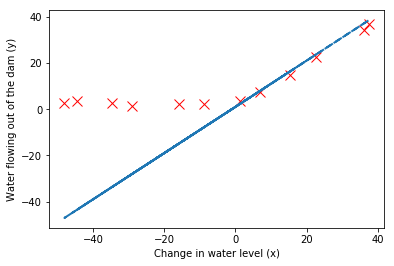

In [124]:
plt.figure()
plt.plot(X_train[:,1:],y_train, 'rx',markersize=10, linewidth=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

plt.plot(X_train[:,1:], X_train @ theta, '--', linewidth=2)

plt.show()
